
# **Objective**
The objective of this task is to develop an end-to-end data mining project by using the machine learning library
Scikit-Learn in Python. The output of the project is a classification model that predict whether the incomes
exceed $50K/yr based on census data.

# Importing the Dependencies

In [28]:
import numpy as np # For doing numerical operations
import pandas as pd # For loading and manipulating dataframes
import matplotlib.pyplot as plt # For graphics
import seaborn as sns # For graphics
import joblib # For exporting model for deployment
sns.set(style='white', context='notebook', palette='deep')

import warnings # Remove any warnings if we get any
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split # To split the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler # To deal with Categorical features and normalization
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix # For evaluation of the model
from sklearn.model_selection import GridSearchCV # For fine-tuning the model

# Loading Dataset

In [29]:
df = pd.read_csv('adult.csv')
df.head() # Printing first 5 rows of data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Dealing with Missing Values

In [30]:
df.isna().sum() # Checking for null (missing) values

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

From the above result its showing that there are no null values but we can clearly see the missing values in the head of the data above. Missing values are marked with '?' so we need to map all '?' to NaN values

In [31]:
df[df == '?'] = np.nan # Mapping '?' to NaN

In [32]:
df.isna().sum() # Now checking again for missing data

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Now we can clearly see that 3 of our features has missing values. Upon seeing the data head we notice that these 3 features are categorical in nature so we can fill the missing values with the most frequent ones (Mode of the column)

In [33]:
### Filling the missing values with the most frequent value (Mode)

for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [34]:
df.isna().sum() # Now checking again for missing data

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

We have successfully dealt with the missing data. Data set is ready to be explored.

# Discover and Visualize the Data

## *Data Statistics*

In [35]:
df.shape # Printing shape of the data

(48842, 15)

The final shape of the pre-processed data is (48842, 15)

In [36]:
# Unique value of eachcategoritcal features

for col in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    print(df[col].unique())

['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
['Male' 'Female']
['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Camb

In [37]:
df.describe().T # Discovering statistics about the data

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


We can see from the above satistics of the numerical features that each feature has different minimum and maximum range which may create difficulty for the classifer to learn trend. So we will be requiring normalize/standardize the data before we can pass it to machine learning algorithm

## *Instances Count*

Lets explore our target class, income. We have two classes, <=50k and >50k. Lets find out the distribution of instances in both classes 

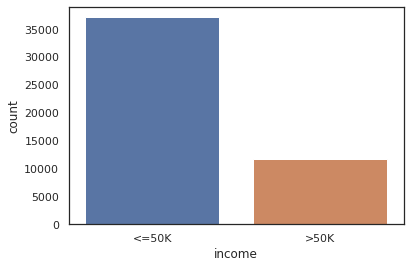

In [38]:
# Checking number of instances in both classes

sns.countplot(df['income'],label="Count")
plt.show()

From above figure we can notice that most of the poeple have less than 50K earning and only a small group of people earn more than 50K

## *Education Num Vs. Income*

We know that education is very much connected with how much someone earns so we need to see whats the relation between education num and our final target class, income

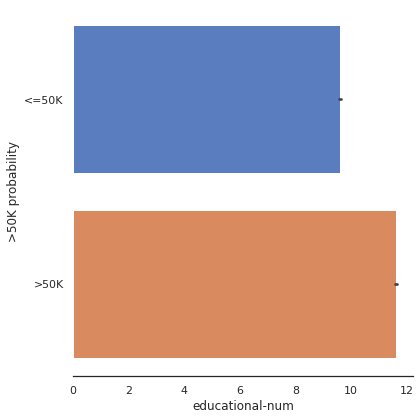

In [39]:
# Explore Education Num vs Income
plot = sns.factorplot(x="educational-num",y="income",data=df,kind="bar",size = 6,palette = "muted")
plot.despine(left=True)
plot = plot.set_ylabels(">50K probability")

From above figure we can say that people with more education earns more which is kind of ground truth in reality as well

## *Hours Per Week Vs. Income*

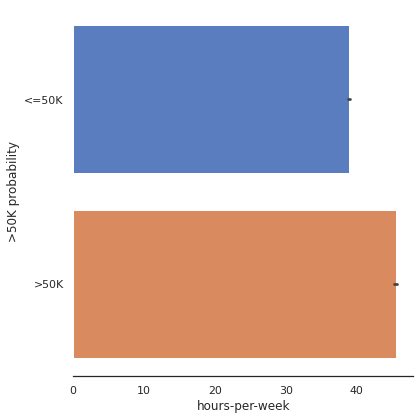

In [40]:
# Explore Hours Per Week vs Income
plot  = sns.factorplot(x="hours-per-week",y="income",data=df,kind="bar",size = 6,palette = "muted")
plot.despine(left=True)
plot = plot.set_ylabels(">50K probability")

We can see from above figure that people who work more hours per week earn more and hence lie in >50K class. Hence we can conclude that more works = more earning

## *Age Vs. Income*

Lets see the distribution of age group in both of our classes

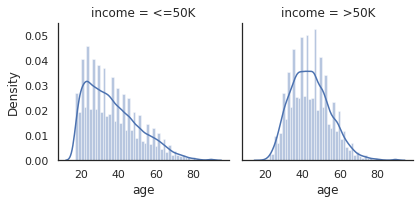

In [41]:
# Explore Age vs Income
g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "age")
plt.show()

From the above result we can see that both our classes contains all types of age groups, but, <=50K class has a skewed distribution of younger poeple in it, as the distribution if tilted towards left. Which is obvious in mosts of the cases as one need to have experience in order to earn more.

## *Correlation Matrix*

In machine learning we need to make sure that each of our feature vector is independent of the others. This is to ensure that we have maximum varience in out individual features. If two or more features are somehow related to each other more than a decided threshold, then we need to drop those redundant features. That is why plotting correlation matrix of features is important before we pass the data to machine learning algorithms

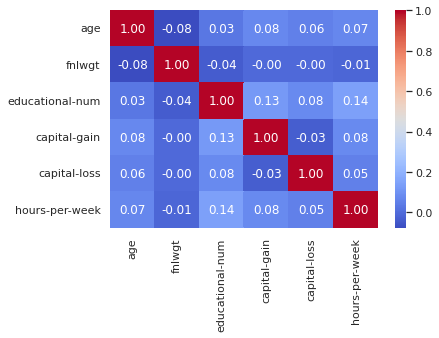

In [42]:
# Correlation matrix of numerical values
numeric_features = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week','income']
corr = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

From the above correlation matrix we can see that no numerical feature is correlated with any other. Which is good for the data hence we do not need to drop any of the features

# **Preparing data for Machine Learning Algorithms**

First of all we need to separete the features into an X vector and our target class into y vector

In [43]:
X = df.drop(['income'], axis=1) # Extracting features

y = df['income'] # Extracting target class

In [44]:
X.head() # Printing the head of features to ensure that we only have features

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States


Now we need to split the data so that we use 2/3 for training and 1/3 for testing the models as suggested in requirements

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) # Setting test size to 1/3

We can see from above head of the features that they contains categorical features as well while the machine learning algorithms can only understand numbers so we need to make sure that we map these caetgories to numbers. We can do that by using LabelEncoder from sklearn

In [46]:
# Mapping Categorical Features to Numbers

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for feature in categorical:
  le = LabelEncoder()
  X_train[feature]=le.fit_transform(X_train[feature])
  X_test[feature]=le.transform(X_test[feature])

In [47]:
X_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
16235,27,3,133770,9,13,4,9,1,1,1,2202,0,52,29
32509,32,3,166634,11,9,2,6,0,2,1,0,0,40,38
5303,31,3,158672,1,7,5,7,1,4,1,0,0,38,32
39027,39,3,491000,9,13,4,3,2,2,1,0,0,45,38
36848,22,3,137876,15,10,4,10,1,4,1,0,0,20,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,31,3,153078,7,12,4,2,3,3,1,0,0,50,38
45891,60,3,399387,5,4,5,8,4,2,0,0,0,15,38
42613,55,3,175942,10,16,2,9,0,4,1,0,1977,55,38
43567,29,5,85572,1,7,2,7,5,4,0,0,0,5,38


Data statistics suggested us to normalize/standardize the data. Machine learning models work fast and good with standardized data. We can do this by using StandarScalar from sklearn

In [48]:
# Standardizing the features

scalar = StandardScaler()
X_train = pd.DataFrame(scalar.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scalar.transform(X_test), columns=X.columns)

In [49]:
X_train.head() # Printing the head of standardized features

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.851206,-0.093147,-0.528064,-0.332475,1.142238,0.924328,0.719452,-0.276577,-3.181817,0.702153,0.157777,-0.216002,0.931494,-1.244123
1,-0.487335,-0.093147,-0.216837,0.182599,-0.417739,-0.402675,-0.039179,-0.899346,-1.991133,0.702153,-0.144041,-0.216002,-0.033991,0.257765
2,-0.560109,-0.093147,-0.292238,-2.392769,-1.197727,1.587830,0.213698,-0.276577,0.390236,0.702153,-0.144041,-0.216002,-0.194905,-0.743494
3,0.022085,-0.093147,2.854955,-0.332475,1.142238,0.924328,-0.797809,0.346192,-1.991133,0.702153,-0.144041,-0.216002,0.368295,0.257765
4,-1.215078,-0.093147,-0.489179,1.212746,-0.027744,0.924328,0.972329,-0.276577,0.390236,0.702153,-0.144041,-0.216002,-1.643133,0.257765


From the above output we can see that our data is now standardized and now we can feed it to machine learning algorithm

# **Logistic Regression**

In [50]:
LR = LogisticRegression() # Intializing Logistic Regression
LR.fit(X_train,y_train) # Trianing the model on training data
y_pred = LR.predict(X_test) # Calculating predictions on test data

## *Classification Report*

In [51]:
print(classification_report(y_test, y_pred)) # Printing the confusion matrix

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89     12240
        >50K       0.71      0.45      0.55      3878

    accuracy                           0.82     16118
   macro avg       0.77      0.69      0.72     16118
weighted avg       0.81      0.82      0.81     16118



From the above classification report we can see that we are getting the final accuracy of **82%** which is good without setting any parameters.

# **Guassian Naive Bayes**

In [52]:
GNB = GaussianNB() # Initializing Naive Bayes
GNB.fit(X_train, y_train) # Training the Model on Training Data
y_pred = GNB.predict(X_test) # Predicting from model on test data

## *Classification Report*

In [53]:
print(classification_report(y_test, y_pred)) # Printing the confusion matrix

              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88     12240
        >50K       0.68      0.35      0.46      3878

    accuracy                           0.80     16118
   macro avg       0.75      0.65      0.67     16118
weighted avg       0.79      0.80      0.78     16118



From the above classification report we can see that we are getting the final accuracy of **80%** which is good without setting any parameters but it is less than that of Logistic Regression

# **K-Nearest Neighbhours**


In [54]:
KNN = KNeighborsClassifier(n_neighbors=18) # Initializing the model with tuned K
KNN.fit(X_train, y_train) # Fitting the model on training data
y_pred = KNN.predict(X_test) # Predicting from model on test data

## *Classification Report*

In [55]:
print(classification_report(y_test, y_pred)) # Printing the confusion matrix

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     12240
        >50K       0.71      0.55      0.62      3878

    accuracy                           0.84     16118
   macro avg       0.79      0.74      0.76     16118
weighted avg       0.83      0.84      0.83     16118



From above classificatin report we can see that KNN gives slightly a better accuracy (84%) than the other algorithms. So I ll be using KNN to deploy the heroku application

# **Exporting Model Files**


In [56]:
joblib.dump(KNN, "model.pkl") # Exporting the model
joblib.dump(scalar, "s_scaler.pkl") # Exporting the standard scalar
joblib.dump(le, "label_ecnoder.pkl") # Exporting the label encoder
joblib.dump(X_test, "train_labels.pkl") # Exporting train file for label encoder

['train_labels.pkl']